Predicting Restaurant Revenue: A Machine Learning Approach with XGBoost, SVM, and Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset for revenue prediction

data = pd.read_csv('restaurant_revenue.csv')


In [3]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [5]:
# Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Customers,1000.0,53.271000,26.364914,10.000000,30.000000,54.000000,74.000000,99.000000
Menu_Price,1000.0,30.219120,11.278760,10.009501,20.396828,30.860614,39.843868,49.974140
Marketing_Spend,1000.0,9.958726,5.845586,0.003768,4.690724,10.092047,14.992436,19.994276
Average_Customer_Spending,1000.0,29.477085,11.471686,10.037177,19.603041,29.251365,39.553220,49.900725
Promotions,1000.0,0.497000,0.500241,0.000000,0.000000,0.000000,1.000000,1.000000
Reviews,1000.0,49.837000,29.226334,0.000000,24.000000,50.000000,76.000000,99.000000
Monthly_Revenue,1000.0,268.724172,103.982950,-28.977809,197.103642,270.213964,343.395793,563.381332


In [6]:
# To check if any null value is present or not
data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

Visualization for better understanding the data features 

E:\Anaconda_instalation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


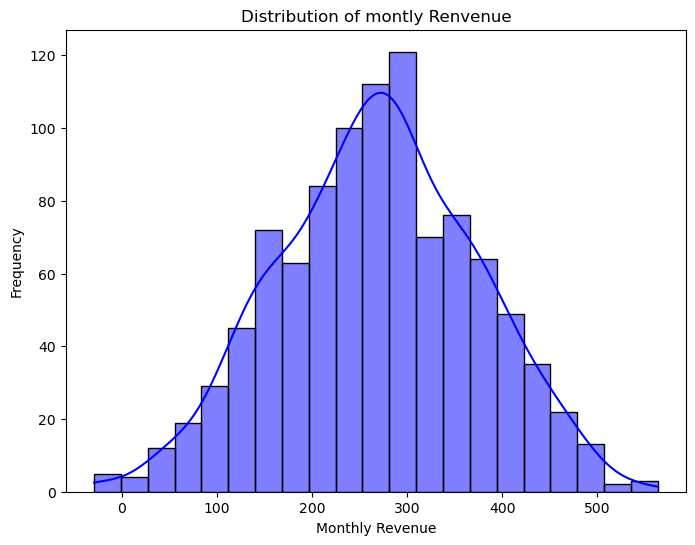

In [7]:
# Distribution of Montly Revenue
plt.figure(figsize=(8,6))
sns.histplot(data['Monthly_Revenue'],kde=True,color='blue')
plt.title("Distribution of montly Renvenue")
plt.xlabel("Monthly Revenue")
plt.ylabel("Frequency")
plt.show()

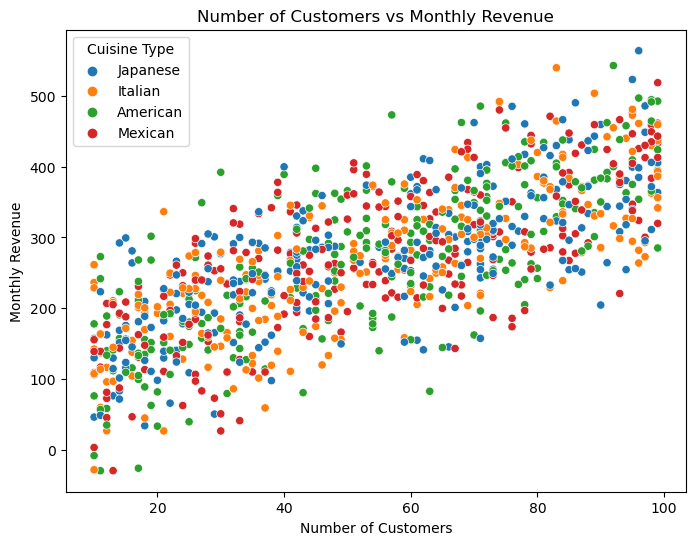

In [14]:
# relationship between number of customers and monthly revenue
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Number_of_Customers' ,y='Monthly_Revenue',hue='Cuisine_Type')
plt.title("Number of Customers vs Monthly Revenue")
plt.xlabel("Number of Customers")
plt.ylabel("Monthly Revenue")
plt.legend(title='Cuisine Type')
plt.show()

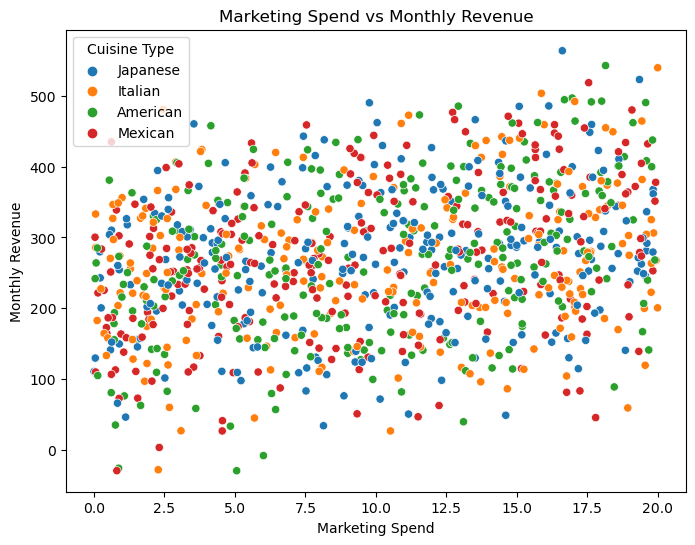

In [12]:
# IMpact of Marketing spending on Monthly revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Marketing_Spend', y='Monthly_Revenue', hue='Cuisine_Type')
plt.title('Marketing Spend vs Monthly Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Monthly Revenue')
plt.legend(title='Cuisine Type')
plt.show()

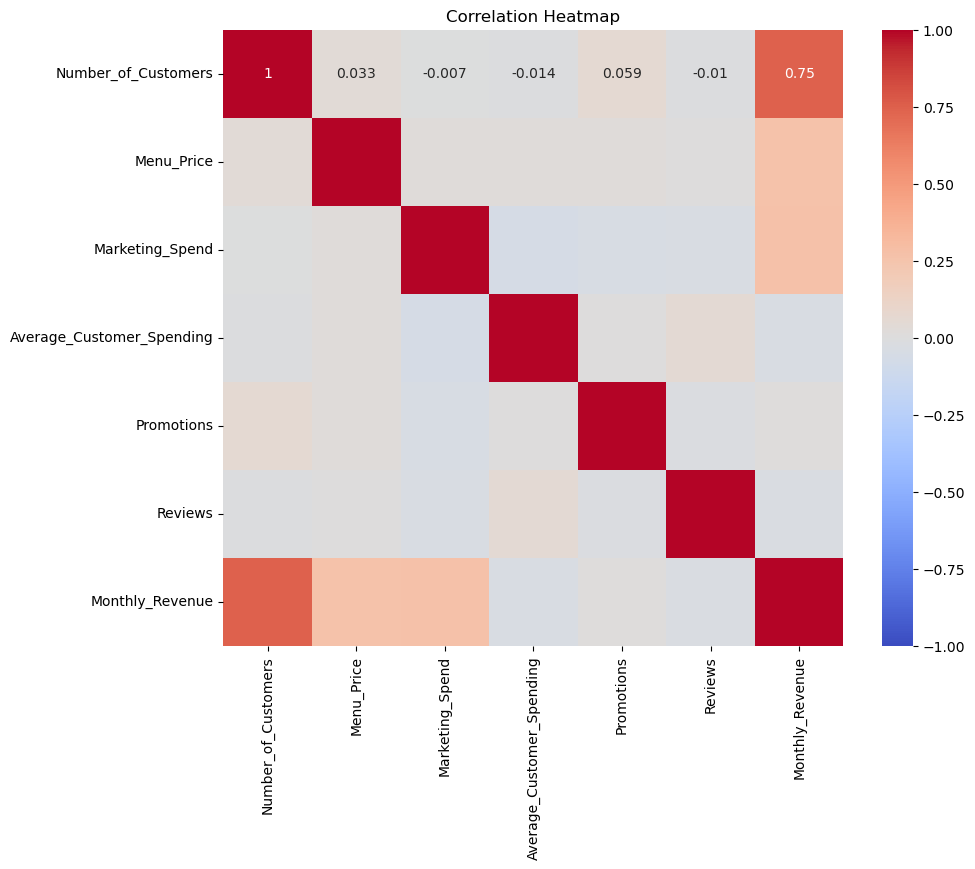

In [17]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
gh = data.drop('Cuisine_Type',axis=1)
sns.heatmap(gh.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



Modeling and Comparison

In [29]:
# importing all the models required
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score

In [36]:
#Encode categorical variables and scale numerical variables
categorical_features=['Cuisine_Type']
numerical_features = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 
                      'Average_Customer_Spending', 'Promotions', 'Reviews']

preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(),categorical_features)
    ]
)

In [37]:
# splitting the data into train and test sets

X = data.drop('Monthly_Revenue',axis=1)
y=data['Monthly_Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# models

models={
    "Random Forest":RandomForestRegressor(random_state=42),
    "Support Vector Machine":SVR(),
    "XGBoost":XGBRegressor(random_state=42)
}



In [39]:
# make dictionary to model performance
model_performance={}

In [45]:
# train and evaluation each model
import numpy as np 

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor',preprocessor),('regressor',model)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    #calculate metrics
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    

    model_performance[name] = {'MAE':mae ,'RMSE' :rmse ,'R^2' : r2 }

performance_df = pd.DataFrame(model_performance).T
performance_df
    
   
    
   
    
    
    

,MAE,RMSE,R^2
Random Forest,51.232043,63.563037,0.630138
Support Vector Machine,71.157064,88.188476,0.288042
XGBoost,57.619819,70.740343,0.541895


Text(0, 0.5, 'Mean Absolute Error')

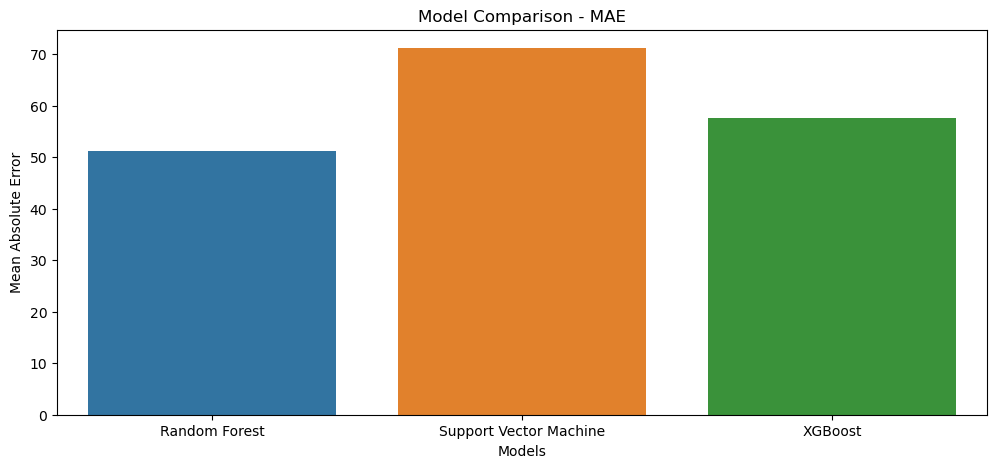

In [41]:
# visualize the model performance metrics
plt.figure(figsize=(12,5))

# MAE comparison 
sns.barplot(x=performance_df.index, y=performance_df['MAE'])
plt.title('Model Comparison - MAE')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Root Mean Squared Error')

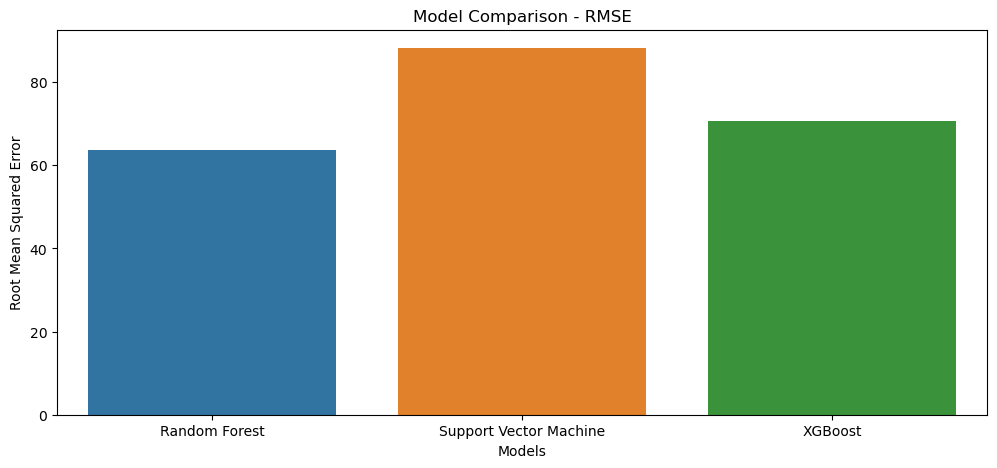

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x=performance_df.index, y=performance_df['RMSE'])
plt.title('Model Comparison - RMSE')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')

Text(0, 0.5, 'R^2 Score')

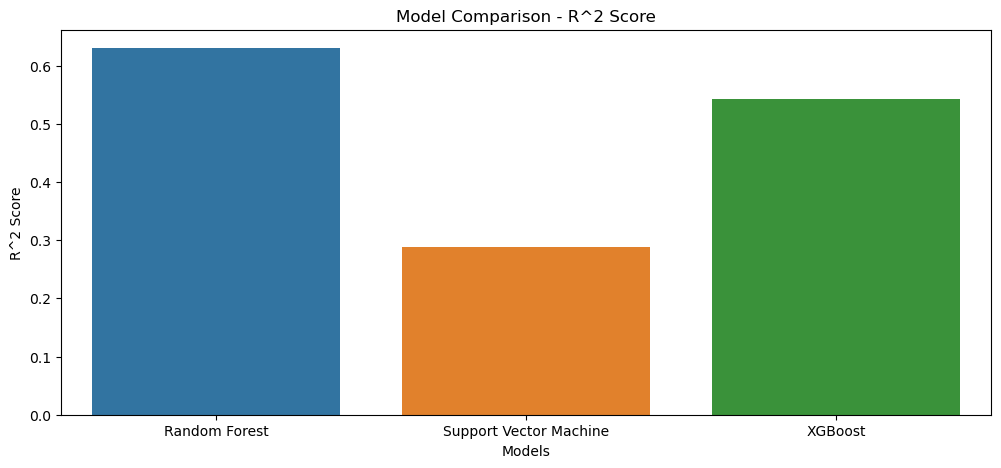

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x=performance_df.index, y=performance_df['R^2'])
plt.title('Model Comparison - R^2 Score')
plt.xlabel('Models')
plt.ylabel('R^2 Score')